In [2]:
#Import necessary packages
import keras
import numpy as np
import math
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle as cPickle


# Importing and normalizing data

In [3]:
#Import dataset and normalize to [0,1]
#Has shape (num_samples, 28, 28)
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0
print(data_test.shape)
data_train = data_train.reshape(60000, 28, 28, 1)
data_test = data_test.reshape(10000, 28, 28, 1)
print(data_test.shape)
#Create labels as one-hot vectors
#labels_train and labels_test have shapes (60000, 10) and (10000 10,) respectively
labels_train = keras.utils.np_utils.to_categorical(labels_train, num_classes=10)
labels_test = keras.utils.np_utils.to_categorical(labels_test, num_classes=10)


4431872/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000, 28, 28, 1)


#  Activation Functions

# Sigmoid Activation Functions

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "sigmoid"))
        
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_sig = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_sig.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_sig_mdata = CNN_dropout_both_act_sig.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act_sig.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 52s 596ms/step - loss: 2.6619 - accuracy: 0.0985 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 16s 533ms/step - loss: 2.3155 - accuracy: 0.1035 - val_loss: 2.3004 - val_accuracy: 0.1000
Epoch 3/100
30/30 [==============================] - 16s 532ms/step - loss: 2.2643 - accuracy: 0.1571 - val_loss: 2.1629 - val_accuracy: 0.1201
Epoch 4/100
30/30 [==============================] - 16s 535ms/step - loss: 1.8328 - accuracy: 0.3256 - val_loss: 1.6510 - val_accuracy: 0.3417
Epoch 5/100
30/30 [==============================] - 16s 534ms/step - loss: 1.2880 - accuracy: 0.5181 - val_loss: 1.2213 - val_accuracy: 0.5815
Epoch 6/100
30/30 [==============================] - 16s 536ms/step - loss: 1.0490 - accuracy: 0.5988 - val_loss: 1.1469 - val_accuracy: 0.5987
Epoch 7/100
30/30 [==============================] - 16s 536ms/step - loss: 0.9362 - accuracy: 0.6448 - val_loss: 1.1474 - val_accuracy:

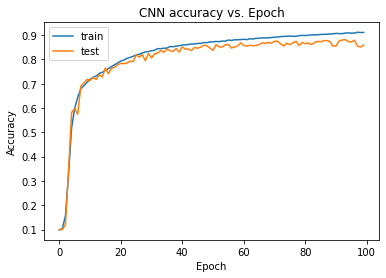

In [ ]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_act_sig_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_sig_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

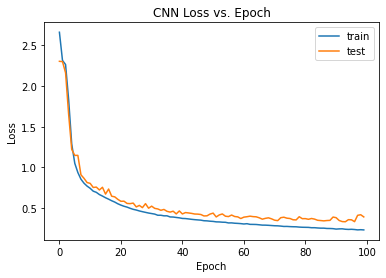

In [ ]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_act_sig_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_sig_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

# tanh Activation Functions

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both_act():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "tanh"))
        
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_tanh = CNN_dropout_both_act()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_tanh.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_tanh_mdata = CNN_dropout_both_act_tanh.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act_tanh.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 51s 584ms/step - loss: 8.0087 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 16s 522ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 3/100
30/30 [==============================] - 16s 523ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 4/100
30/30 [==============================] - 16s 535ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 5/100
30/30 [==============================] - 16s 527ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 6/100
30/30 [==============================] - 16s 537ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy: 0.1000
Epoch 7/100
30/30 [==============================] - 16s 534ms/step - loss: 8.0590 - accuracy: 0.1000 - val_loss: 8.0590 - val_accuracy:

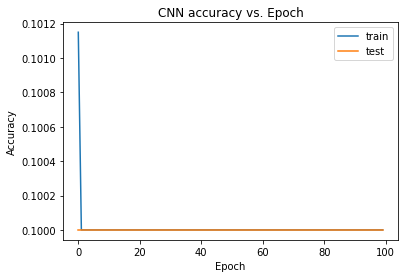

In [ ]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_act_tanh_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_tanh_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


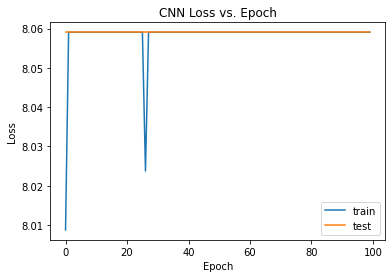

In [ ]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_act_tanh_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_tanh_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

# Using Sigmoid for hidden units

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both_act_hid_sig():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'sigmoid', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'sigmoid', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "sigmoid", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "sigmoid", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "sigmoid"))
        
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_hid_sig = CNN_dropout_both_act_hid_sig()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_hid_sig.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_hid_sig_mdata = CNN_dropout_both_act_hid_sig.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act_hid_sig.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 9s 276ms/step - loss: 2.3092 - accuracy: 0.0993 - val_loss: 2.3118 - val_accuracy: 0.1000
Epoch 2/100
30/30 [==============================] - 8s 270ms/step - loss: 2.3049 - accuracy: 0.0992 - val_loss: 2.3075 - val_accuracy: 0.1000
Epoch 3/100
30/30 [==============================] - 8s 272ms/step - loss: 2.3046 - accuracy: 0.1001 - val_loss: 2.3068 - val_accuracy: 0.1000
Epoch 4/100
30/30 [==============================] - 8s 273ms/step - loss: 2.3046 - accuracy: 0.0998 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 5/100
30/30 [==============================] - 8s 273ms/step - loss: 2.3045 - accuracy: 0.0984 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 6/100
30/30 [==============================] - 8s 273ms/step - loss: 2.3046 - accuracy: 0.1001 - val_loss: 2.3100 - val_accuracy: 0.1000
Epoch 7/100
30/30 [==============================] - 8s 274ms/step - loss: 2.3047 - accuracy: 0.1008 - val_loss: 2.3072 - val_accuracy: 0.1000

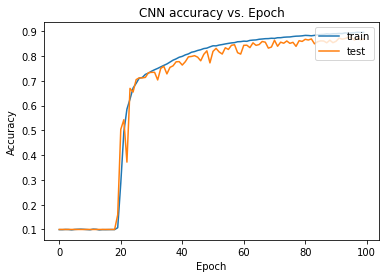

In [ ]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_act_hid_sig_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_hid_sig_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


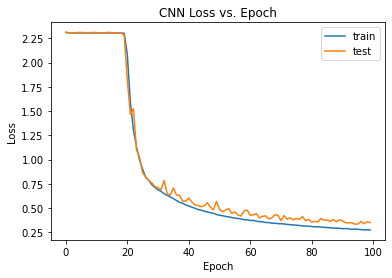

In [ ]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_act_hid_sig_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_hid_sig_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

# Using tanh for hidden units

In [ ]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both_act_hid_tanh():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'tanh', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'tanh', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "tanh", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "tanh", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "sigmoid"))
        
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_hid_tanh = CNN_dropout_both_act_hid_tanh()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_hid_tanh.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_hid_tanh_mdata = CNN_dropout_both_act_hid_tanh.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act_hid_tanh.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 9s 275ms/step - loss: 1.0572 - accuracy: 0.6124 - val_loss: 0.7784 - val_accuracy: 0.7203
Epoch 2/100
30/30 [==============================] - 8s 272ms/step - loss: 0.5936 - accuracy: 0.7746 - val_loss: 0.5927 - val_accuracy: 0.7868
Epoch 3/100
30/30 [==============================] - 8s 273ms/step - loss: 0.4985 - accuracy: 0.8132 - val_loss: 0.6323 - val_accuracy: 0.7667
Epoch 4/100
30/30 [==============================] - 8s 274ms/step - loss: 0.4416 - accuracy: 0.8356 - val_loss: 0.5310 - val_accuracy: 0.8034
Epoch 5/100
30/30 [==============================] - 8s 278ms/step - loss: 0.4021 - accuracy: 0.8517 - val_loss: 0.4974 - val_accuracy: 0.8142
Epoch 6/100
30/30 [==============================] - 8s 279ms/step - loss: 0.3707 - accuracy: 0.8616 - val_loss: 0.4797 - val_accuracy: 0.8290
Epoch 7/100
30/30 [==============================] - 8s 281ms/step - loss: 0.3554 - accuracy: 0.8683 - val_loss: 0.4575 - val_accuracy: 0.8361

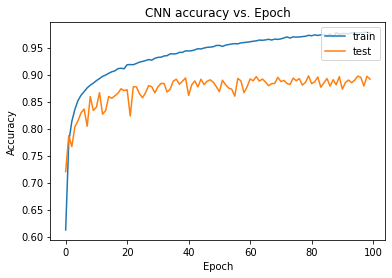

In [ ]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_act_hid_tanh_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_hid_tanh_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


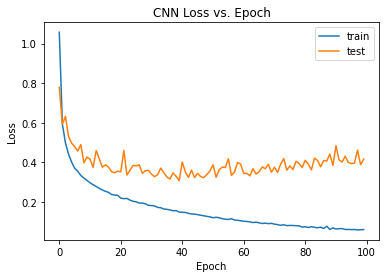

In [ ]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_act_hid_tanh_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_hid_tanh_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

# Using Relu for hidden units

In [29]:
num_classes=10
#Create and train model architecture
def CNN_dropout_both_act_hid_relu():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()

    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (3,3), activation = 'relu', input_shape = (28,28,1)))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))
    
    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(128, (3,3), activation = 'relu', input_shape = (13,13,256) ))
    
    # Randomly freezes 30% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.3))

    # Add a 2x2 MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2,2), strides = None, padding = 'valid', data_format = None ))
    
    # Flatten data for input into Dense layers
    model.add(Flatten())
    
    # Add Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))
    
    # Add another Dense layer with 100 perceptrons
    model.add(Dense(100, activation = "relu", kernel_initializer = "normal"))

    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "sigmoid"))
        
    return model


#Create instance of CNN model graph
CNN_dropout_both_act_hid_relu = CNN_dropout_both_act_hid_relu()

#Compile model using an appropriate loss and optimizer algorithm
CNN_dropout_both_act_hid_relu.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CNN_dropout_both_act_hid_relu_mdata = CNN_dropout_both_act_hid_relu.fit(data_train, labels_train, validation_data = (data_test, labels_test), epochs =100, batch_size = 2048, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CNN_dropout_both_act_hid_relu.evaluate(data_test, labels_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/100
30/30 [==============================] - 18s 555ms/step - loss: 1.3178 - accuracy: 0.5120 - val_loss: 0.9505 - val_accuracy: 0.7295
Epoch 2/100
30/30 [==============================] - 16s 548ms/step - loss: 0.6914 - accuracy: 0.7374 - val_loss: 0.6877 - val_accuracy: 0.7674
Epoch 3/100
30/30 [==============================] - 16s 546ms/step - loss: 0.5901 - accuracy: 0.7747 - val_loss: 0.6413 - val_accuracy: 0.7750
Epoch 4/100
30/30 [==============================] - 16s 545ms/step - loss: 0.5105 - accuracy: 0.8062 - val_loss: 0.6460 - val_accuracy: 0.7936
Epoch 5/100
30/30 [==============================] - 16s 546ms/step - loss: 0.4651 - accuracy: 0.8273 - val_loss: 0.5123 - val_accuracy: 0.8224
Epoch 6/100
30/30 [==============================] - 16s 546ms/step - loss: 0.4234 - accuracy: 0.8413 - val_loss: 0.4548 - val_accuracy: 0.8562
Epoch 7/100
30/30 [==============================] - 16s 546ms/step - loss: 0.3944 - accuracy: 0.8532 - val_loss: 0.4412 - val_accuracy:

(60000, 28, 28, 1)
the percentage of active neurons is =  0.407


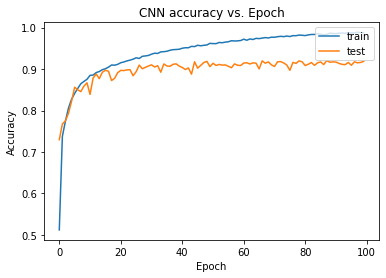

In [47]:
#Plot accuracy vs epoch
plt.plot(CNN_dropout_both_act_hid_relu_mdata.history['accuracy'])
plt.plot(CNN_dropout_both_act_hid_relu_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


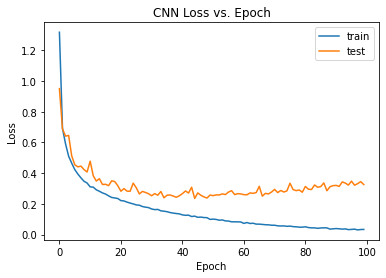

In [48]:
#Plot loss vs epoch
plt.plot(CNN_dropout_both_act_hid_relu_mdata.history['loss'])
plt.plot(CNN_dropout_both_act_hid_relu_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='bottom right')
plt.show()

# Finding the number of active neurons 

In [50]:
# Extract the Model Outputs for all the Layers
Model_Outputs = [layer.output for layer in CNN_dropout_both_act_hid_relu.layers]
# Create a Model with Model Input as Input and the Model Outputs as Output
Activation_Model = keras.Model(CNN_dropout_both_act_hid_relu.input, Model_Outputs)
print(data_train.shape)
Activations = Activation_Model.predict(data_train[0:5])
total_Neurons = 0;
active_Neurons = 0;
for i in [-3,-2]: #dense layers with relu activations
    for j in range(5): # first 5 training images
        for k in range(100):
            total_Neurons = total_Neurons + 1;
            #print(Activations[i][j][k].shape)
            if Activations[i][j][k] > 0.00001:
                  active_Neurons = active_Neurons + 1;
print ("the percentage of active neurons is = ", active_Neurons/total_Neurons)

(60000, 28, 28, 1)
the percentage of active neurons is =  0.409
